# Importing Libraries & Data

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Rectangle
import matplotlib.colors as mcolors
import string

sns.set()

plt.rcParams['font.family'] = ['Times New Roman', 'sans-serif']
plt.rcParams['figure.dpi'] = 144

In [2]:
url = '../data/Life-Expectancy-Data-Updated.csv'
df = pd.read_csv(url)
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


# Data Exploration

In [3]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [4]:
df.nunique()

Country                         179
Region                            9
Year                             16
Infant_deaths                   847
Under_five_deaths              1035
Adult_mortality                2850
Alcohol_consumption            1164
Hepatitis_B                      80
Measles                          87
BMI                             120
Polio                            77
Diphtheria                       80
Incidents_HIV                   393
GDP_per_capita                 2564
Population_mln                 1803
Thinness_ten_nineteen_years     200
Thinness_five_nine_years        207
Schooling                       130
Economy_status_Developed          2
Economy_status_Developing         2
Life_expectancy                 396
dtype: int64

In [5]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [6]:
df['Year'].max()

2015

# Data Preparation

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
y = df['Life_expectancy']
X = df.drop('Life_expectancy', axis=1)

In [9]:
numeric_features = X.select_dtypes(include=['int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_t = pipeline.fit_transform(X)

In [28]:
data_numeric_and_target = pd.concat([df[numeric_features], y], axis=1)

#corr_matrix = data_numeric_and_target.corr()
corr_matrix= df.corr()

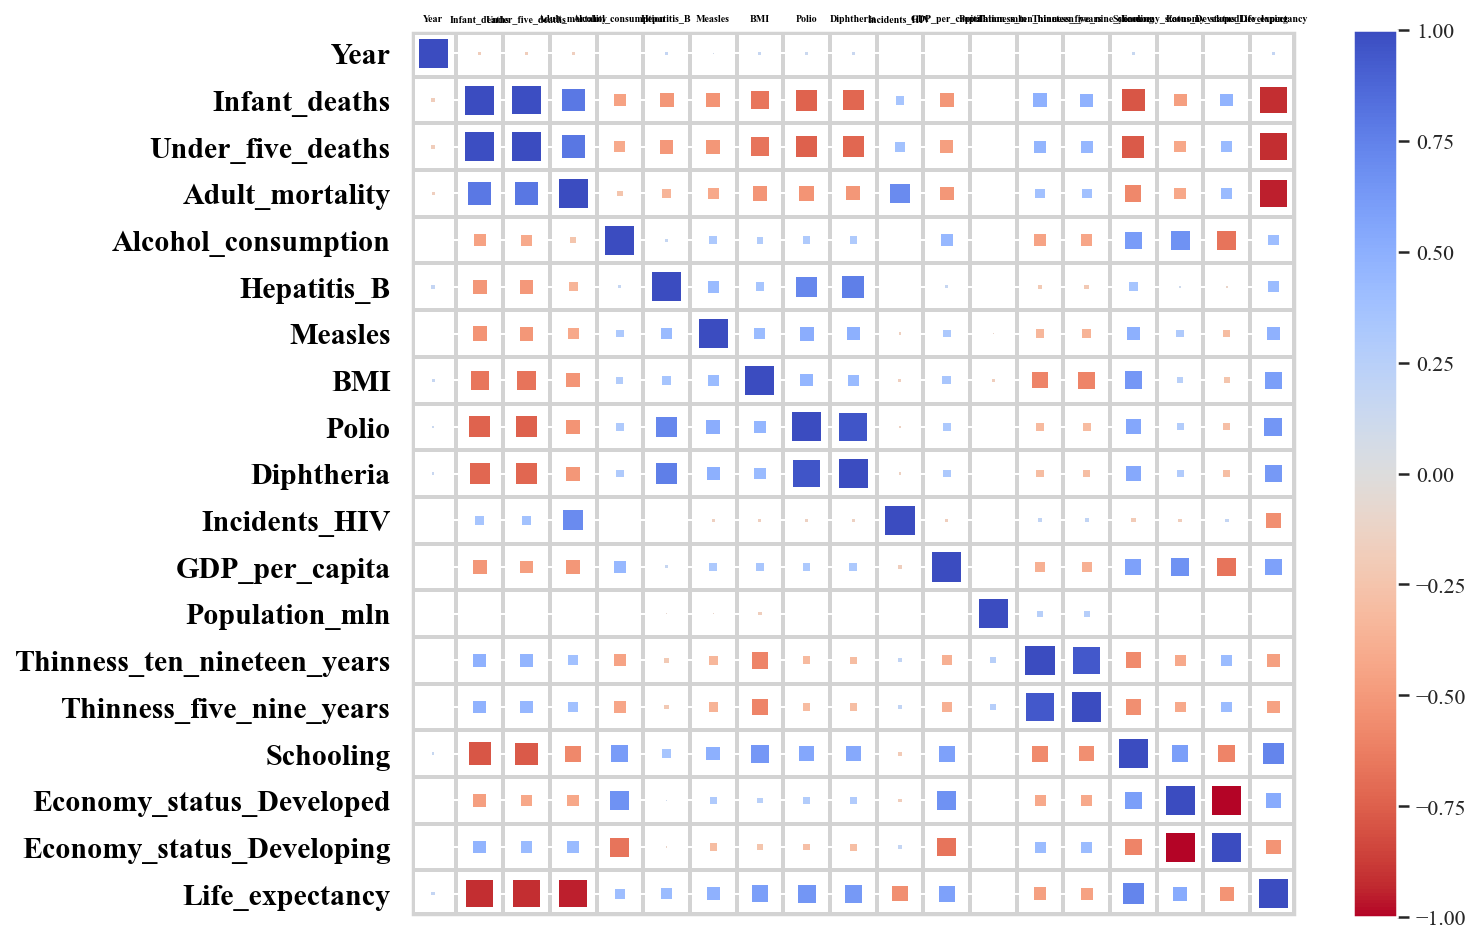

In [26]:
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
#plt.title('Correlation Heatmap')
#plt.show()

# create a white grid with the same dimensions as the correlation matrix
fig, ax = plt.subplots(figsize=(10,8))
ax.set_facecolor('white')
ax.imshow(np.ones_like(corr_matrix), cmap='gray_r', interpolation='nearest')

# set the tick labels and rotation for the x and y axes
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))

# shift ticks of x axis to top of the graph
ax.tick_params(axis='x', which='both', labelbottom=False, labeltop=True, bottom=False, top=True, length=0)

# format ticks
ax.set_yticklabels(corr_matrix.columns, fontsize=15, color = "black", fontweight = "bold")
ax.set_xticklabels(corr_matrix.columns, fontsize=5, color = "black", fontweight = "bold")


# create grid lines between the tick labels
ax.set_xticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True, linestyle="solid")
ax.set_yticks(np.arange(len(corr_matrix.columns) + 1) - .5, minor=True,  linestyle="solid")
ax.grid(which="minor", color="lightgray", linestyle="solid", linewidth=2, )

# add rectangle around the grid
rect = plt.Rectangle((-.5, -.5), len(corr_matrix.columns), len(corr_matrix.columns), linewidth=5, edgecolor='lightgray', facecolor='none')
ax.add_patch(rect)

# create squares with radius proportional to the absolute value of correlation
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        correlation = corr_matrix.iat[i, j]
        norm = plt.Normalize(-1, 1)  # specify the range of values for the colormap
        sm = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
        color = sm.to_rgba(correlation)
        size = abs(correlation)/1.5
        rect = Rectangle(xy=(i-size/2, j-size/2), width=size, height=size, facecolor=color)
        ax.add_patch(rect)

# add color bar
norm = mcolors.Normalize(vmin=-1, vmax=1)
c_scale = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm_r')
cbar = plt.colorbar(c_scale, ax=ax)
plt.show()

# Model training & testing

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_t,y)

LinearRegression()

In [14]:
import random

In [20]:
test = {
    'Country': ['France'], #Value to enter
    'Region': ['European Union'], #Auto-value based on Country
    'Year': [2015], #To be removed
    'Infant_deaths': [random.uniform(1, 10)], #Auto-value based on Country
    'Under_five_deaths': [random.uniform(1, 15)], #Auto-value based on Country
    'Adult_mortality': [random.uniform(80, 120)], #Auto-value based on Country
    'Alcohol_consumption': [random.uniform(1, 10)], #Value to enter
    'Hepatitis_B': [random.randint(80, 100)], #Value to enter
    'Measles': [random.uniform(0, 10)], #Value to enter
    'BMI': [30], #Value to enter - model to be corrected
    'Polio': [random.randint(80, 100)], #Value to enter
    'Diphtheria': [random.randint(80, 100)], #Value to enter
    'Incidents_HIV': [random.uniform(0, 1)], #Value to enter
    'GDP_per_capita': [random.uniform(30000, 60000)], #Value to enter
    'Population_mln': [random.uniform(60, 80)], #TO remove
    'Thinness_ten_nineteen_years': [random.uniform(1, 5)], #To be removed
    'Thinness_five_nine_years': [random.uniform(1, 5)],  #To be removed
    'Schooling': [random.uniform(15, 20)],  #Auto-value based on Country may change later
    'Economy_status_Developed': [1],  #Auto-value based on Country - to be fused
    'Economy_status_Developing': [0]  #Auto-value based on Country - to be fused
}

In [21]:
X_test = pd.DataFrame(test)

In [22]:
X_test_t = pipeline.transform(X_test)

In [23]:
model.predict(X_test_t)

array([82.94539946])

What do I want : 

- Country of birth (this dataset), changed into numbers with 0 being the country with longest life expectancy
- Country of residency (this dataset) with % of outcomes

- Alcohol consumption
#- Hep B / HIV (too personal ?)
#- Measles / Polio / Diphtheria (to be removed)
- BMI : to be improved with other datasets, need to have higher impact
- GDP per capita : to be replaced with global income (categorical, socio-professional category)
- Smoker
- Sex
- Physical Activity
- Dietary Habits
- Family History
- Diabetes / chronic disease ?

- Section 1 : Country of birth / residency / Age / Sex / Socio-professional cat.
- Section 2 : Size & Weight (auto calculus of BMI) / Dietary Habits / Physical activity scale
- Section 3 : Drinking status / Smoking status / Family History / Chronic diseases 


Country / Date of birth / Sex / Socio-professional cat/ BMI / Dietary Habits (0 to 4) / Physical activity (0 to 4) / Drinking status (0 to 4) / Smoking status (0 to 4) / Family History diseases (0 to 2) / Chronic diseases (0 to 2)

# Creating random data for testing

In [193]:
# Create a new DataFrame with the desired columns
df_new = pd.DataFrame(columns=[
    'Country', 'DoB', 'Sex', 'Socpro', 'BMI',
    'Diet_Hab', 'Phys_act', 'Drink_stat', 'Smoking_stat',
    'Family_dis', 'Chronic', 'Life_exp'
])

# Specify the number of rows you want per country
rows_per_country = 5

for _, country_row in df.iterrows():
    rows_to_add = []
    for _ in range(rows_per_country):
        new_row = {
            'Country': country_row['Country'],
            'DoB': pd.to_datetime(np.random.choice(pd.date_range('1950-01-01', '2000-01-01'))).year,
            'Sex': np.random.choice([0, 1]),  # 0 for Female, 1 for Male
            'Socpro': np.random.randint(0, 5),  # Numerical representation of socio-professional category
            'BMI': np.exp(np.random.uniform(np.log(20), np.log(50))),  # Log scale for BMI
            'Diet_Hab': np.random.randint(0, 5),
            'Phys_act': np.random.randint(0, 5),
            'Drink_stat': np.random.randint(0, 5),
            'Smoking_stat': np.random.randint(1, 6),  # Increase impact of smoking
            'Family_dis': np.random.randint(1, 6),  # Increase impact on family diseases
            'Chronic': np.random.poisson(2)  # Generate random number for chronic diseases
        }

        # Set Life_expectancy based on logical conditions
        life_expectancy = np.random.uniform(70, 75)  # Adjust the range to be more centered and realistic

        # Adjust life expectancy based on different factors
        life_expectancy += country_row['GDP_per_capita'] / 1000  # Lower impact of GDP per capita
        life_expectancy -= new_row['BMI'] * 0.5  # Lower impact of BMI
        life_expectancy += (5 - new_row['Diet_Hab']) * 0.5  # Lower impact of dietary habits
        life_expectancy += (5 - new_row['Phys_act']) * 0.5  # Lower impact of physical activity
        life_expectancy -= new_row['Smoking_stat'] * 1.0  # Lower impact of smoking
        life_expectancy -= new_row['Drink_stat'] * 0.5  # Lower impact of drinking
        life_expectancy -= np.exp(new_row['Chronic']) * 0.1  # Reduced impact of chronic diseases

        # Adjust life expectancy based on sex
        life_expectancy += (3 if new_row['Sex'] == 0 else 0)  # Females generally live longer

        # Adjust life expectancy based on socio-professional category
        life_expectancy += new_row['Socpro'] * 0.5  # Lower impact increases with higher category

        # Adjust life expectancy based on family history of diseases
        life_expectancy -= new_row['Family_dis'] * 0.5  # Lower impact of family history of diseases

        new_row['Life_exp'] = max(0, life_expectancy)  # Ensure life expectancy is not negative

        rows_to_add.append(new_row)

    df_new = pd.concat([df_new, pd.DataFrame(rows_to_add)], ignore_index=True)

# Convert relevant columns to numeric data types
numeric_columns = ['DoB', 'Sex', 'Socpro', 'Diet_Hab', 'Phys_act', 'Drink_stat', 'Smoking_stat', 'Family_dis', 'Chronic']
df_new[numeric_columns] = df_new[numeric_columns].astype(int)

In [194]:
df_new

,Country,DoB,Sex,Socpro,BMI,Diet_Hab,Phys_act,Drink_stat,Smoking_stat,Family_dis,Chronic,Life_exp
0,Turkiye,1965,1,4,22.938850,4,4,2,1,2,3,69.946002
1,Turkiye,1956,0,2,41.628746,1,3,3,3,5,1,61.116604
2,Turkiye,1985,1,1,40.878812,2,0,3,4,2,1,61.969026
3,Turkiye,1986,1,1,49.093988,1,1,2,5,4,1,55.879162
4,Turkiye,1973,0,2,34.044196,0,2,4,1,5,1,69.986830
...,...,...,...,...,...,...,...,...,...,...,...,...
14315,Iceland,1970,0,0,32.506322,3,4,3,1,3,1,106.726518
14316,Iceland,1978,0,4,23.807814,1,3,1,1,3,5,97.725000
14317,Iceland,1962,0,2,33.812198,3,4,2,4,5,0,102.623985
14318,Iceland,1986,1,0,28.874678,4,3,3,3,3,0,104.350478


In [196]:
y_gen = df_new['Life_exp']
X_gen = df_new.drop('Life_exp', axis=1)
X_gen.dtypes

Country          object
DoB               int64
Sex               int64
Socpro            int64
BMI             float64
Diet_Hab          int64
Phys_act          int64
Drink_stat        int64
Smoking_stat      int64
Family_dis        int64
Chronic           int64
dtype: object

In [197]:
numeric_features = X_gen.select_dtypes(include=['int64']).columns
categorical_features = X_gen.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_gent = pipeline.fit_transform(X_gen)

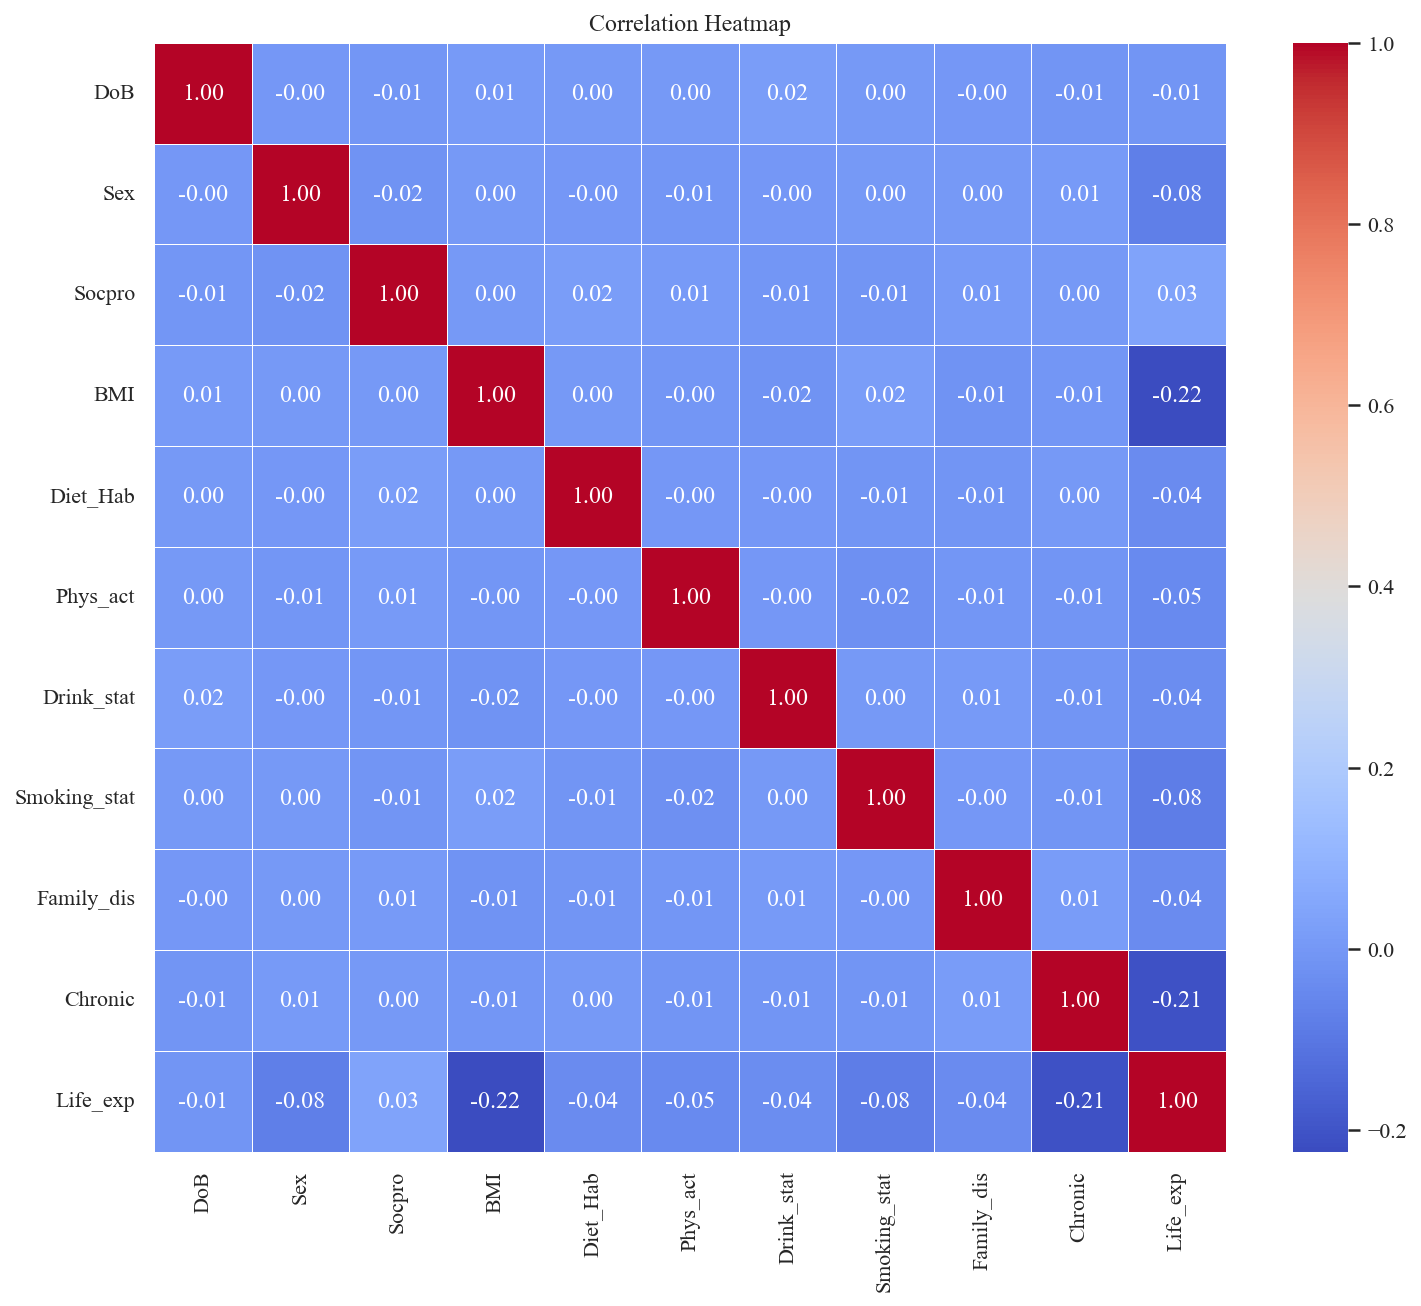

In [198]:
corr_matrix = df_new.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [205]:
X = X_gent
y = y_gen

# Create a pipeline with a linear regression model
model = Pipeline([
    ('regressor', LinearRegression())
])

# Perform grid search
grid_search = GridSearchCV(model, param_grid={}, cv=5, scoring='r2')
grid_search.fit(X, y)

# Get the best cross-validated score
best_score = grid_search.best_score_
print("Best Cross-validated R^2 Score:", best_score)


Best Cross-validated R^2 Score: 0.8635594407664838


In [206]:
model.fit(X_gent,y_gen)

Pipeline(steps=[('regressor', LinearRegression())])

# Creating predict fake profiles

In [201]:
# Get unique countries from df_new
countries = df_new['Country'].unique()

# Function to generate a random profile
def generate_random_profile():
    return {
        'Country': np.random.choice(countries),
        'DoB': np.random.randint(1940, 2011),  # Random year between 1940 and 2010
        'Sex': np.random.choice([0, 1]),
        'Socpro': np.random.randint(0, 5),
        'BMI': np.exp(np.random.uniform(np.log(20), np.log(50))),
        'Diet_Hab': np.random.randint(0, 5),
        'Phys_act': np.random.randint(0, 5),
        'Drink_stat': np.random.randint(0, 5),
        'Smoking_stat': np.random.randint(1, 6),
        'Family_dis': np.random.randint(1, 6),
        'Chronic': np.random.poisson(2)
    }

In [202]:
# Generate 20 random profiles
random_profiles = [generate_random_profile() for _ in range(20)]

# Create a DataFrame with the random profiles
df_random_profiles = pd.DataFrame(random_profiles)

# Ensure correct data types
df_random_profiles['DoB'] = df_random_profiles['DoB'].astype(int)
df_random_profiles['Sex'] = df_random_profiles['Sex'].astype(int)
df_random_profiles['Socpro'] = df_random_profiles['Socpro'].astype(int)
df_random_profiles['BMI'] = df_random_profiles['BMI'].astype(float)
df_random_profiles['Diet_Hab'] = df_random_profiles['Diet_Hab'].astype(int)
df_random_profiles['Phys_act'] = df_random_profiles['Phys_act'].astype(int)
df_random_profiles['Drink_stat'] = df_random_profiles['Drink_stat'].astype(int)
df_random_profiles['Smoking_stat'] = df_random_profiles['Smoking_stat'].astype(int)
df_random_profiles['Family_dis'] = df_random_profiles['Family_dis'].astype(int)
df_random_profiles['Chronic'] = df_random_profiles['Chronic'].astype(int)

df_random_profiles

,Country,DoB,Sex,Socpro,BMI,Diet_Hab,Phys_act,Drink_stat,Smoking_stat,Family_dis,Chronic
0,Nepal,1963,0,2,24.320734,2,1,2,3,3,3
1,Antigua and Barbuda,1955,0,2,25.276657,0,4,2,1,1,3
2,Paraguay,1982,1,1,25.060033,0,1,0,1,1,0
3,Austria,1958,1,0,21.742619,1,4,1,5,2,1
4,"Gambia, The",1994,1,2,37.386777,0,4,1,1,2,1
5,Burundi,1982,0,1,39.030496,0,4,3,1,3,0
6,Bosnia and Herzegovina,1978,0,0,39.041657,0,4,0,3,3,1
7,Mozambique,1955,0,4,31.055706,3,1,0,4,4,2
8,"Bahamas, The",2007,1,3,22.617634,1,0,3,5,3,3
9,Eswatini,1949,0,0,47.380797,3,1,0,4,2,0


In [203]:
X_predict_gen = pipeline.transform(df_random_profiles)

In [207]:
results = df_random_profiles
results['life_expect'] = model.predict(X_predict_gen)

results

,Country,DoB,Sex,Socpro,BMI,Diet_Hab,Phys_act,Drink_stat,Smoking_stat,Family_dis,Chronic,life_expect
0,Nepal,1963,0,2,24.320734,2,1,2,3,3,3,51.977927
1,Antigua and Barbuda,1955,0,2,25.276657,0,4,2,1,1,3,70.542146
2,Paraguay,1982,1,1,25.060033,0,1,0,1,1,0,68.810899
3,Austria,1958,1,0,21.742619,1,4,1,5,2,1,95.706353
4,"Gambia, The",1994,1,2,37.386777,0,4,1,1,2,1,58.442328
5,Burundi,1982,0,1,39.030496,0,4,3,1,3,0,63.129074
6,Bosnia and Herzegovina,1978,0,0,39.041657,0,4,0,3,3,1,63.465587
7,Mozambique,1955,0,4,31.055706,3,1,0,4,4,2,56.296009
8,"Bahamas, The",2007,1,3,22.617634,1,0,3,5,3,3,82.334916
9,Eswatini,1949,0,0,47.380797,3,1,0,4,2,0,63.250776


In [209]:
import joblib

In [210]:
!ls

first_notebook.ipynb


In [211]:
joblib.dump(model, 'model.pkl')
#loaded_model = joblib.load('model.pkl')

['model.pkl']

In [212]:
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

In [213]:
countries

array(['Turkiye', 'Spain', 'India', 'Guyana', 'Israel', 'Costa Rica',
       'Russian Federation', 'Hungary', 'Jordan', 'Moldova', 'Brazil',
       'Malta', 'Bahamas, The', 'Ukraine', 'Switzerland', 'Norway',
       'Finland', 'Comoros', 'Japan', 'Gabon', 'Ghana', 'Philippines',
       'Congo, Rep.', 'Madagascar', 'Estonia', 'Belize', 'Kazakhstan',
       'Cameroon', 'Zimbabwe', 'Bhutan', 'South Africa', 'Eritrea',
       'Germany', 'Saudi Arabia', 'Kiribati', 'Seychelles', 'Singapore',
       'Togo', 'Denmark', 'Gambia, The', 'Sweden', 'Austria',
       'Kyrgyz Republic', 'Grenada', 'Brunei Darussalam', 'Greece',
       'Uruguay', 'Croatia', 'Romania', 'Central African Republic',
       'Algeria', 'Yemen, Rep.', 'Armenia',
       'St. Vincent and the Grenadines', 'Kenya', 'Micronesia, Fed. Sts.',
       'Antigua and Barbuda', 'Nepal', 'Lithuania', 'Vanuatu',
       'Afghanistan', 'Kuwait', 'Argentina', 'Panama', 'Oman', 'France',
       'Bosnia and Herzegovina', 'Mauritania', 'Somalia